<a href="https://colab.research.google.com/github/rsydx/OpenWeatherMap-data-analysis/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A study how weather phenomena affected by latitude. For this project, we will collect 500 samples of weather data randomly distributed accross the globe. For more understanding of the dataset, we will use multiple method of data virtualization based on temperature, humidity, cloudiness and wind speed.

First of all, we need 500 random coordinates to span across wide range of possible latitudes(-90 to 90 degrees) and longitudes(-180 degrees to 180 degress).

Note: negative latitude indicates South and negative longitude indicates West

In [20]:
import pandas as pd
import numpy as np
np.random.seed(120)
lats=np.random.randint(-90, 90, size=500)
longs=np.random.randint(-180, 180, size=500)
coords = pd.DataFrame({
    "latitude": lats,
    "longitude": longs,
})

coords.head(10)

,latitude,longitude
0,77,-163
1,-90,23
2,68,-136
3,36,-3
4,-80,-57
5,-43,-145
6,-34,126
7,-6,57
8,87,-99
9,-46,-177


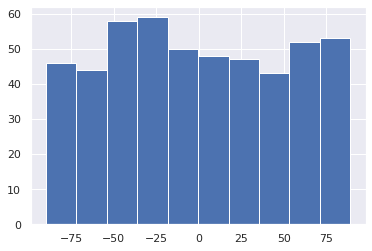

In [21]:
import matplotlib.pyplot as plt
import seaborn


seaborn.set()

plt.hist(coords['latitude'])
plt.show()

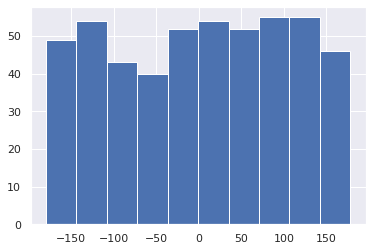

In [22]:
plt.hist(coords['longitude'])
plt.show()

**Setting up weather API**

For this project we will use OpenWeatherData API

In [23]:
import requests
import time
API_KEY='4586c7c86ec511e45bad920ccfa925b2'

def get_weather_data(coords, time_between=1):
    """Queries the OpenWeatherAPI for data.

    Args:
        coords: A Pandas DataFrame with rows containing 'latitude'
            and 'longitude' columns.
        time_between: An integer specifying the sleep time in seconds
            between each API ping.  Defaults to the OpenWeatherAPI's
            recommended limit of 1 request per second.

    Returns:
        A list of nested dicts (loaded JSON results).
    """
    results = []
    for ind, row in coords.iterrows():
        lat, lon = row['latitude'], row['longitude']
        query = f"http://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&APPID={API_KEY}"
        response = requests.get(query)
        results.append(response.json())
        time.sleep(time_between)
    return results

requests is used to make a **get** request, and then using the json function to immediately process response into a Python dict.

**Getting the data**

In [24]:
test_coords =pd.DataFrame({"latitude":[30], "longitude":[-120]})
test_results = get_weather_data(test_coords)
test_results

[{'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 30, 'lon': -120},
  'dt': 1601907023,
  'id': 0,
  'main': {'feels_like': 296.93,
   'grnd_level': 1015,
   'humidity': 84,
   'pressure': 1015,
   'sea_level': 1015,
   'temp': 294.71,
   'temp_max': 294.71,
   'temp_min': 294.71},
  'name': '',
  'sys': {'sunrise': 1601906154, 'sunset': 1601948417},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
    'icon': '01d',
    'id': 800,
    'main': 'Clear'}],
  'wind': {'deg': 33, 'speed': 1.28}}]

In [25]:
full_results = get_weather_data(coords)
full_results[:3]  # Let's peek at the first 3 datapoints

[{'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': 77, 'lon': -163},
  'dt': 1601907208,
  'id': 0,
  'main': {'feels_like': 263.45,
   'grnd_level': 1008,
   'humidity': 95,
   'pressure': 1008,
   'sea_level': 1008,
   'temp': 271.71,
   'temp_max': 271.71,
   'temp_min': 271.71},
  'name': '',
  'sys': {'sunrise': 1601920489, 'sunset': 1601954718},
  'timezone': -39600,
  'visibility': 8568,
  'weather': [{'description': 'overcast clouds',
    'icon': '04n',
    'id': 804,
    'main': 'Clouds'}],
  'wind': {'deg': 295, 'speed': 8.55}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -90, 'lon': 23},
  'dt': 1601907209,
  'id': 0,
  'main': {'feels_like': 223.47,
   'grnd_level': 687,
   'humidity': 70,
   'pressure': 1021,
   'sea_level': 1021,
   'temp': 229.63,
   'temp_max': 229.63,
   'temp_min': 229.63},
  'name': '',
  'sys': {'sunrise': 0, 'sunset': 0},
  'timezone': 46800,
  'visibility': 10000,
  'weather': [{'d

**Saving the data**

In [26]:
import json
with open("weather.json","w") as outfile:
  json.dump(full_results, outfile)

Unit conversion

In [28]:
def k_to_f(temp):
  """
  convert a Kelvin temperature to fahrenheit
  """
  return temp *9/5 -459.67

def mps_to_mph(speed):
  """converts a meters/s speed to miles/hour"""
  return speed * 2.23694

**The data structure**

In [29]:
important_json_data = []
for point in full_results:
    lat = point['coord']['lat']
    lon = point['coord']['lon']
    temp = k_to_f(point['main']['temp'])
    humidity = point['main']['humidity']
    cloudiness = point['clouds']['all']
    wind = mps_to_mph(point['wind']['speed'])

    row = [lat, lon, temp, humidity, cloudiness, wind]
    important_json_data.append(row)

weather_df = pd.DataFrame(important_json_data)
weather_df.columns = [
    "latitude",
    "longitude",
    "temperature",
    "humidity",
    "clouds",
    "wind",
]
weather_df.head()

,latitude,longitude,temperature,humidity,clouds,wind
0,77,-163,29.408,95,100,19.125837
1,-90,23,-46.336,70,100,7.001622
2,68,-136,33.800,100,90,6.934514
3,36,-3,68.108,65,92,14.115091
4,-80,-57,-23.872,76,0,6.196324


In [30]:
weather_df.to_csv("weather.csv")

**Plotting the data**

Temperature

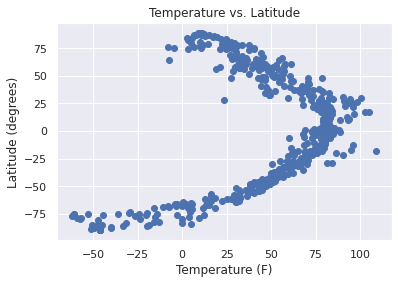

In [31]:
plt.scatter(weather_df.temperature,weather_df.latitude)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude (degrees)")
plt.title("Temperature vs. Latitude")
plt.show()

Humidity

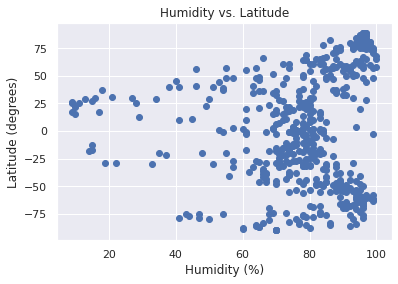

In [32]:
plt.scatter(weather_df.humidity, weather_df.latitude)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude (degrees)")
plt.title("Humidity vs. Latitude")
plt.show()

Cloudiness

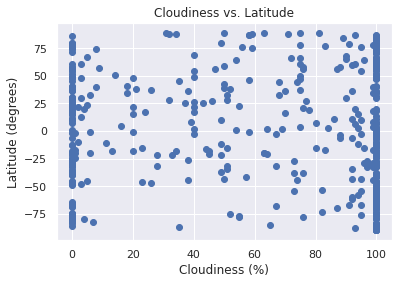

In [34]:
plt.scatter(weather_df.clouds, weather_df.latitude)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude (degrees)")
plt.title("Cloudiness vs. Latitude")
plt.show()

Wind Speed

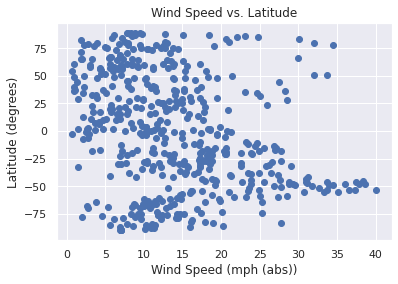

In [36]:
plt.scatter(weather_df['wind'], weather_df['latitude'])
plt.xlabel("Wind Speed (mph (abs))")
plt.ylabel("Latitude (degrees)")
plt.title("Wind Speed vs. Latitude")
plt.show()

The is a clear spikes at about -50 degrees and 50 degrees.